## Name: Irfan Arshad

In [ ]:
# Upload kaggle.json
from google.colab import files
files.upload()

# Move kaggle.json to the appropriate directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the dataset
!kaggle competitions download -c nyc-taxi-trip-duration

# Unzip the downloaded file
!unzip nyc-taxi-trip-duration.zip

In [ ]:
!unzip train.zip
!unzip test.zip
!unzip sample_submission.zip

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load the train dataset into a pandas DataFrame
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


## Data Loading and Preprocessing

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625134 non-null  object 
 1   vendor_id           625134 non-null  int64  
 2   pickup_datetime     625134 non-null  object 
 3   passenger_count     625134 non-null  int64  
 4   pickup_longitude    625134 non-null  float64
 5   pickup_latitude     625134 non-null  float64
 6   dropoff_longitude   625134 non-null  float64
 7   dropoff_latitude    625134 non-null  float64
 8   store_and_fwd_flag  625134 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


In [7]:
train.shape

(1458644, 11)

In [36]:
test.shape

(625134, 11)

In [8]:
# Convert pickup and dropoff datetime columns to datetime type
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'])
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])

In [9]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [10]:
test.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

## Exploratory Data Analysis (EDA)

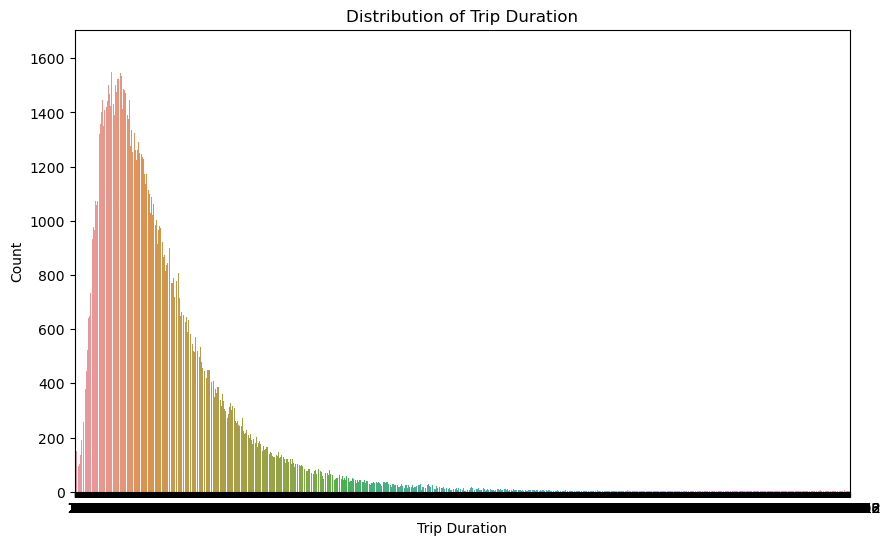

In [11]:
# Example: Bar plot of categorical feature
plt.figure(figsize=(10, 6))
sns.countplot(x='trip_duration', data=train)
plt.xlabel('Trip Duration')
plt.ylabel('Count')
plt.title('Distribution of Trip Duration')
plt.show()

In [12]:
# Statistical summary of trip_duration
train['trip_duration'].describe()

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

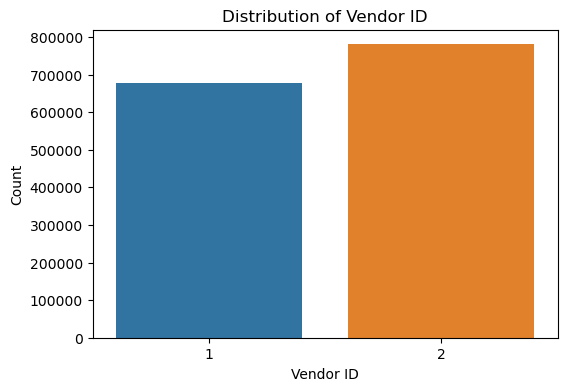

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='vendor_id', data=train)
plt.title('Distribution of Vendor ID')
plt.xlabel('Vendor ID')
plt.ylabel('Count')
plt.show()

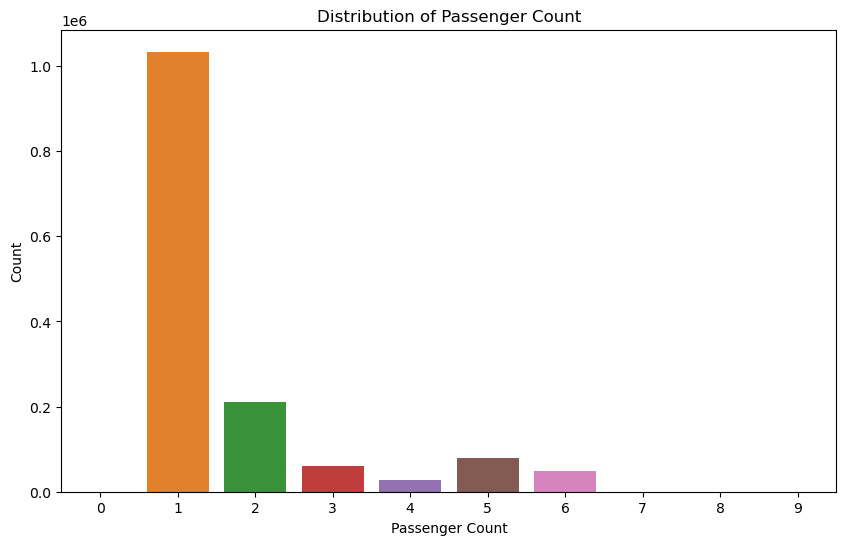

In [14]:
# Distribution of passenger_count
plt.figure(figsize=(10, 6))
sns.countplot(x='passenger_count', data=train)
plt.title('Distribution of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Count')
plt.show()

## Feature Engineering

In [15]:
# Extracting new features from datetime columns
train['pickup_hour'] = train['pickup_datetime'].dt.hour
train['pickup_day_of_week'] = train['pickup_datetime'].dt.dayofweek
train['trip_duration_log'] = np.log1p(train['trip_duration']) # Log transform for skewed target variable

In [16]:
test['pickup_hour'] = test['pickup_datetime'].dt.hour
test['pickup_day_of_week'] = test['pickup_datetime'].dt.dayofweek

In [17]:
# Calculate trip speed (in mph)
train['trip_distance'] = np.sqrt((train['pickup_longitude'] - train['dropoff_longitude'])**2 +
                                 (train['pickup_latitude'] - train['dropoff_latitude'])**2)
train['trip_speed'] = train['trip_distance'] / (train['trip_duration'] / 3600)

In [41]:
# Drop rows with zero trip_duration and unrealistic speeds
train = train[(train['trip_duration'] > 0) & (train['trip_speed'] < 100)]

In [19]:
# Prepare features and target variable
X = train[['vendor_id', 'pickup_hour', 'pickup_day_of_week', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
y = train['trip_duration_log']


In [20]:
# Prepare the test set features
X_test = test[['vendor_id', 'pickup_hour', 'pickup_day_of_week', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]

In [21]:
# Define preprocessing steps
numeric_features = ['pickup_hour', 'pickup_day_of_week', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
categorical_features = ['vendor_id']

In [22]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

In [23]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [25]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.shape

(1166915, 8)

In [27]:
X_val.shape

(291729, 8)

________________________________________________________________________________________________________________________________